In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns
import mapclassify as mc
import matplotlib.pyplot as plt
import folium

import matplotlib.colors as colors


In [2]:
# sns.set_style('white')
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1)

plt.rc('font', family='serif')

plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('legend', title_fontsize='small', fontsize='small')


plt.rcParams['svg.fonttype'] = 'none'

In [34]:
dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl')
ch_g2g18  = gpd.read_file('../../geodata/ch_districts/ch_districts_g2g18.gpkg')
ch_agglo = gpd.read_file('../../geodata/ch_agglo/swiss_urban_agglomerations.gpkg')
ch_muni  = gpd.read_file('../../geodata/ch_gemeindetypen/ch_gemeindetypen_00_merged.gpkg')
ch_land  = gpd.read_file('../../geodata/ch_landtypo/landschaftstypen_2056.gpkg')
ch_income  = gpd.read_file('../../geodata/ch_districts/ch_income_per_commune_2018.gpkg')
# ch_g2g18  = gpd.read_file('../../../geodata/ch_districts/ch_districts_g2g18.gpkg')


In [128]:
maxvsh_cols    = dataset.columns[dataset.columns.str.contains('maxvsh')].tolist()
maxvsh_cols.remove('maxvsh_Sie9')
vaccess_cols   = dataset.columns[dataset.columns.str.contains('vwa')].tolist()
# mean_cols      = dataset.columns[dataset.columns.str.contains('mn')].tolist()
dist_cols      = dataset.columns[dataset.columns.str.contains('sum_')].tolist()
vconfig_cols   = np.setdiff1d(dataset.columns[np.where(dataset.columns == 'snt_0')[0][0]:np.where(dataset.columns == 'cmpx_gini')[0][0]+1].tolist(),dist_cols).tolist()[:-1]
id_cols        = ['ID_Geb','Stockwerk','FassPktX','FassPktY','FassPktZ']

dataset['unit_pano'] = dataset['unit_pano'].fillna(0)

In [130]:
grp = dataset.groupby('Agglo_Name')[maxvsh_cols]

scarce_maxvsh = np.array(maxvsh_cols)[(grp.median().round(0)==0).all()].tolist()
abund_maxvsh = np.array(maxvsh_cols)[(grp.median().round(0)!=0).all()].tolist()

In [157]:
sel_10agglo_lst = dataset.groupby(['Agglo_Name','Rich_Nabr'])['GMDNR'].size().unstack().sort_values(by = 'R', ascending = False).head(10).index.tolist()+['Rural']


In [225]:
rename_col = {
       'Dac1' :'Roof', 
       'Fas2' :'Fassade',  
       'Geb12':'Building',  
       'Kue8' :'Artificial Grass',  
       'Nat3' :'Nature',  
       'Veg3' :'Roof', 
       'Ver6' :'Road Traffic', 
       'sky'  :'Sky', 
       'Abb7' :'Industrial', 
       'Abw14':'Waste Waster', 
       'Flu18':'Airfield',
       'Ueb5' :'Other', 
       'Gew1' :'Water Bodies',  
       'Hel19':'Heliport', 
       'Keh15':'Waste Incineration',  
       'Lan10':'Agriculture', 
       'Lan17':'Airport', 
       'Sak13':'Sacral',  
       'Sie9' :'Settlement', 
       'Ver11':'High-Performing Traffic',  
       'Was16':'Water Basin',  
       'Fer3':'Far Dist. (1km - 50km)',
       'Mit2':'Mid Dist. (100m - 1km)',
       'Nah1':'Near Dist. (< 100m)',
       'Une4':'Infinite Dist. (> 50km)',
       'Sky': 'Sky',
       'cmpx_gini': 'Element Inequality - Gini',
       'cmpx_rh':'Element Richness',
       'cmpx_shanon':'Element Balance - Shanon',
       'dist_gini':'Distance Inequality - Gini',
       'pano_rich':'Panoramic Richness',
       'pano_sum':'Panoramic Share',
       'refuge' : 'Refuge',
       'rh_snt_0':'Neutral Sentiment',
       'rh_snt_Neg':'Negative Sentiment',
       'rh_snt_Pos':'Positive Sentiment',
       'snt_0': 'Neutral Sentiment',
       'snt_Neg':'Negative Sentiment',
       'snt_Pos':'Positive Sentiment',
       'Gürtel der Grosszentren':'', 
       'Grosszentren':'Major centers',
       'Gürtel der Mittelzentren':'Belt of medium centers', 
       'Nebenzentren der Grosszentren':'Secondary centers of large centers',
       'Periurbane ländliche Gemeinden':'Periurban rural communities', 
       'Mittelzentren':'Medium centers',
       'Touristische Gemeinden':'Tourist municipalities', 
       'Agrargemeinden':'Agricultural communities', 
       'Kleinzentren': 'Small centers' ,
       'Faltenjura':'Jura mountains', 'Taflejura':'Taflejura', 'Mittelland':'Midland', 'Alpenraum':'Alpine region', 'unabhängig':'Independent'
}

In [171]:
dataset.NAME.unique()

array(['Gürtel der Grosszentren', 'Grosszentren',
       'Gürtel der Mittelzentren', 'Nebenzentren der Grosszentren',
       'Periurbane ländliche Gemeinden', 'Mittelzentren',
       'Touristische Gemeinden', 'Agrargemeinden', 'Kleinzentren', nan],
      dtype=object)

In [159]:
import seaborn as sns

Text(0, 1.0, 'maxVSH (%) of abundant elements for median ranked building in Agglomeration')

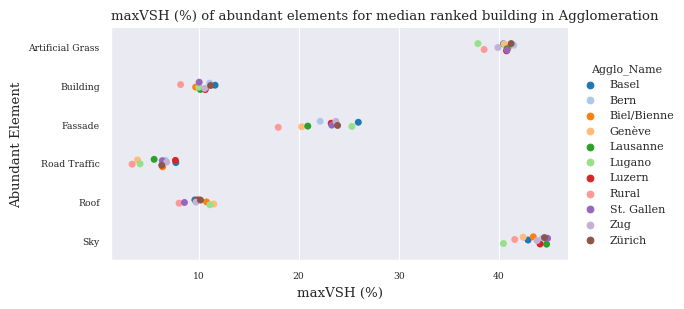

In [160]:
tgt = 'Agglo_Name'

dat = dataset.query('Agglo_Name in @sel_10agglo_lst')
dat = dat[[tgt] + abund_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = 'tab20')
plt.xlabel('maxVSH (%)'),plt.ylabel('Abundant Element'), 

plt.title('maxVSH (%) of abundant elements for median ranked building in Agglomeration', x = 0, ha = 'left')

In [161]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Text(0, 1.0, 'Proportion of buildings with a Scarce View')

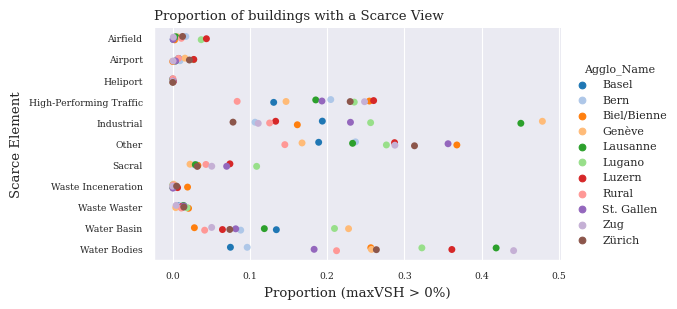

In [162]:
tgt = 'Agglo_Name'

dat = dataset.query('Agglo_Name in @sel_10agglo_lst')
dat = dat[[tgt] + scarce_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).apply(lambda x: np.mean(x > 0)).reset_index()

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = 'tab20')
plt.xlabel('Proportion (maxVSH > 0%)'),plt.ylabel('Scarce Element'), 

plt.title('Proportion of buildings with a Scarce View', x = 0, ha = 'left')

In [163]:
dist_cols = ['sum_ShNah1','sum_ShMit2', 'sum_ShFer3', 'sum_ShUne4', 'sum_ShSky']


Text(0.5, 1.0, 'maxVSH (%) of elements in distance for median ranked building in Agglomeration')

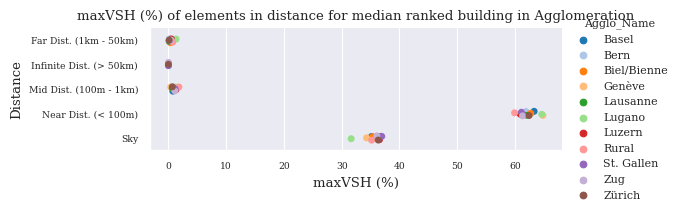

In [164]:
tgt = 'Agglo_Name'

dat = dataset.query('Agglo_Name in @sel_10agglo_lst')
dat = dat[[tgt] + dist_cols]
dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 2, aspect = 3, palette = 'tab20')
plt.xlabel('maxVSH (%)'),plt.ylabel('Distance'), 

plt.title('maxVSH (%) of elements in distance for median ranked building in Agglomeration', ha = 'center')
# plt.xscale('log')

In [165]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Text(0.5, 1.0, 'Visual Configuration Scores')

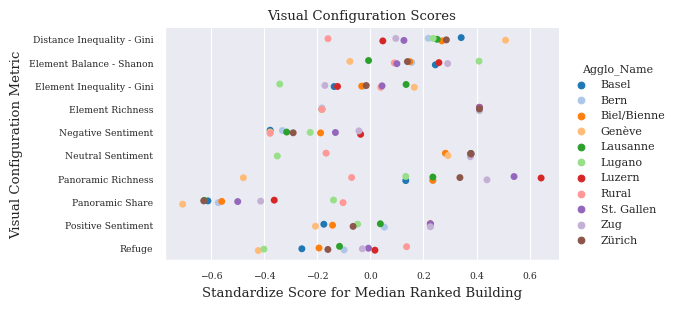

In [166]:
tgt = 'Agglo_Name'

dat = dataset.query('Agglo_Name in @sel_10agglo_lst')
dat = dat[[tgt] + vconfig_cols]

dat[vconfig_cols] = StandardScaler().fit_transform(dat[vconfig_cols])
# dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = 'tab20')
plt.xlabel('Standardized Score'),plt.ylabel('Visual Configuration Metric'), 

plt.title('Visual Configuration Scores for Median Ranked Building', ha = 'center')
# plt.xscale('log')


C:\Users\swietek\AppData\Local\Temp\ipykernel_13860\2206619470.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[vconfig_cols] = StandardScaler().fit_transform(dat[vconfig_cols])


Text(0.5, 1.0, 'Visual Configuration Scores for Median Ranked Building')

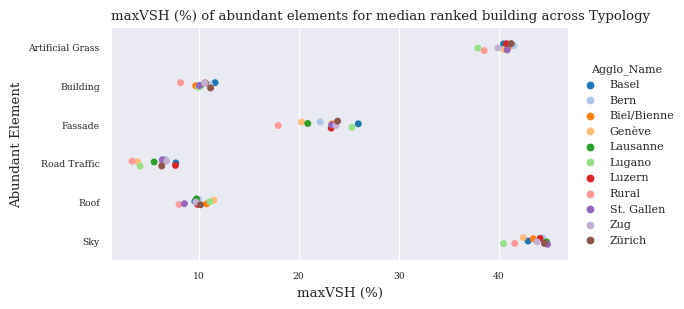

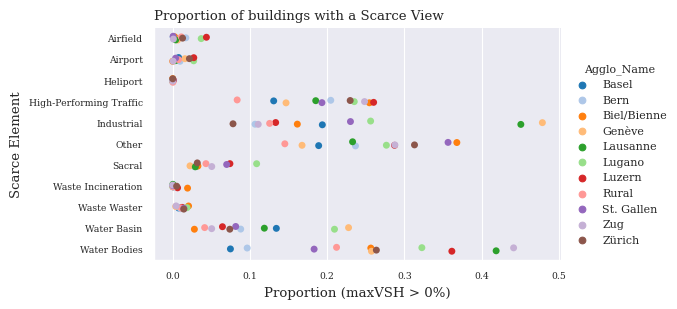

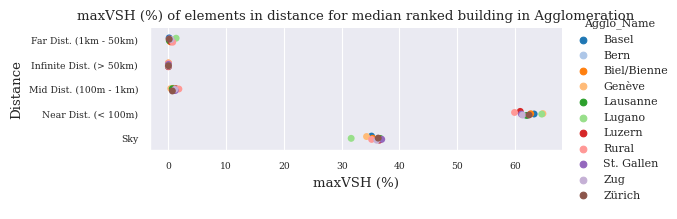

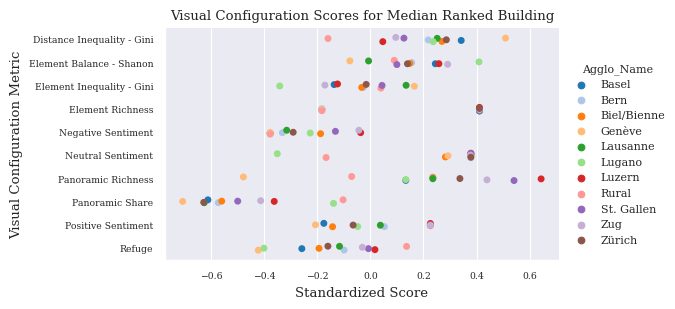

In [175]:
tgt = 'Agglo_Name'
pal ='tab20'
dat_ = dataset.query('Agglo_Name in @sel_10agglo_lst')
#_______________________________________________________________________________________________________________________


dat = dat_[[tgt] + abund_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('maxVSH (%)'),plt.ylabel('Abundant Element'), 

plt.title('maxVSH (%) of abundant elements for median ranked building in Agglomeration', x = 0, ha = 'left')

#_______________________________________________________________________________________________________________________


dat = dat_[[tgt] + scarce_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).apply(lambda x: np.mean(x > 0)).reset_index()

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('Proportion (maxVSH > 0%)'),plt.ylabel('Scarce Element'), 

plt.title('Proportion of buildings with a Scarce View', x = 0, ha = 'left')


#_______________________________________________________________________________________________________________________

dat = dat_[[tgt] + dist_cols]
dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 2, aspect = 3, palette = pal)
plt.xlabel('maxVSH (%)'),plt.ylabel('Distance'), 

plt.title('maxVSH (%) of elements in distance for median ranked building in Agglomeration', ha = 'center')
# plt.xscale('log')

#_______________________________________________________________________________________________________________________


dat = dat_[[tgt] + vconfig_cols]

dat[vconfig_cols] = StandardScaler().fit_transform(dat[vconfig_cols])
# dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('Standardized Score'),plt.ylabel('Visual Configuration Metric'), 

plt.title('Visual Configuration Scores for Median Ranked Building', ha = 'center')
# plt.xscale('log')


In [212]:
ch_geme = gpd.read_file('../../geodata/ch_gemeindetypen/ch_gemeindetypen_00_merged.gpkg')

dat_ = gpd.sjoin(left_df = dataset.drop(columns = 'NAME'), right_df=ch_geme[['NAME','geometry']], how = 'left', op = 'within')

dat_['NAME'] = dat_['NAME'].map(rename_col).fillna('Other')
dat_ = dat_.query('NAME != "Other"')

C:\Users\swietek\AppData\Local\Temp\ipykernel_13860\730480486.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[vconfig_cols] = StandardScaler().fit_transform(dat[vconfig_cols])


Text(0.5, 1.0, 'Visual Configuration Scores for Median Ranked Building')

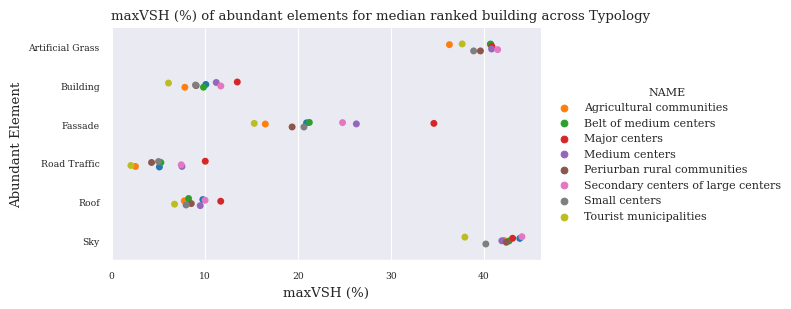

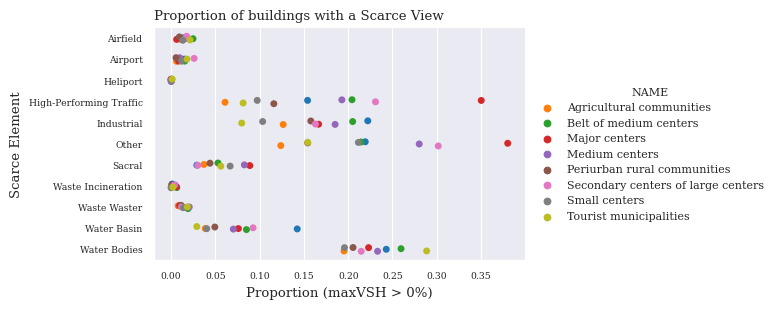

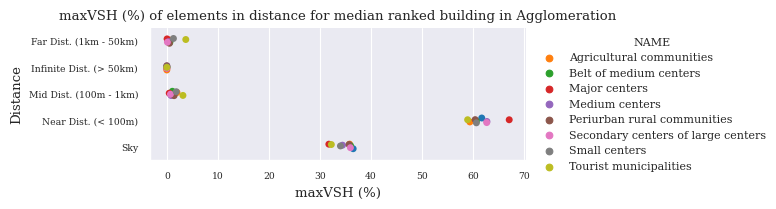

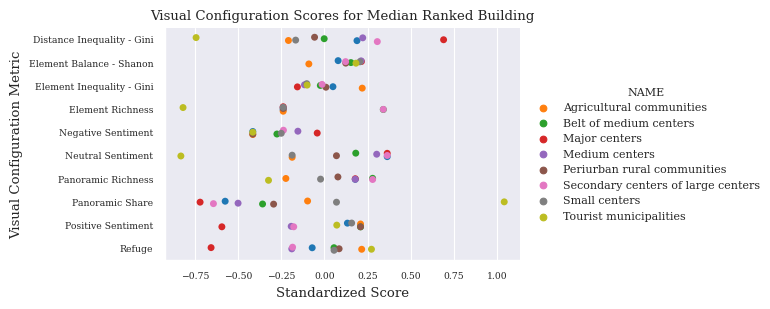

In [221]:
tgt = 'NAME'
pal ='tab10'


dat = dat_[[tgt] + abund_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('maxVSH (%)'),plt.ylabel('Abundant Element'), 

plt.title('maxVSH (%) of abundant elements for median ranked building in Typology', x = 0, ha = 'left')

#_______________________________________________________________________________________________________________________


dat = dat_[[tgt] + scarce_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).apply(lambda x: np.mean(x > 0)).reset_index()

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('Proportion (maxVSH > 0%)'),plt.ylabel('Scarce Element'), 

plt.title('Proportion of buildings with a Scarce View', x = 0, ha = 'left')


#_______________________________________________________________________________________________________________________

dat = dat_[[tgt] + dist_cols]
dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 2, aspect = 3, palette = pal)
plt.xlabel('maxVSH (%)'),plt.ylabel('Distance'), 

plt.title('maxVSH (%) of elements in distance for median ranked building in Typology', ha = 'center')
# plt.xscale('log')

#_______________________________________________________________________________________________________________________


dat = dat_[[tgt] + vconfig_cols]

dat[vconfig_cols] = StandardScaler().fit_transform(dat[vconfig_cols])
# dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('Standardized Score'),plt.ylabel('Visual Configuration Metric'), 

plt.title('Visual Configuration Scores for Median Ranked Building', ha = 'center')
# plt.xscale('log')


In [224]:
ch_land.REGNAME_DE.unique()

array(['Faltenjura', 'Taflejura', 'Mittelland', 'Alpenraum', 'unabhängig'],
      dtype=object)

In [228]:
ch_land = gpd.read_file('../../geodata/ch_landtypo/landschaftstypen_2056.gpkg')
dat_ = gpd.sjoin(left_df = dataset, right_df=ch_land[['REGNAME_DE','geometry']], how = 'left', op = 'within')

dat_['REGNAME_DE'] = dat_['REGNAME_DE'].map(rename_col).fillna('Other')
dat_ = dat_.query('REGNAME_DE != "Other"')

C:\Users\swietek\AppData\Local\Temp\ipykernel_13860\4114708949.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[vconfig_cols] = StandardScaler().fit_transform(dat[vconfig_cols])


Text(0.5, 1.0, 'Visual Configuration Scores for Median Ranked Building')

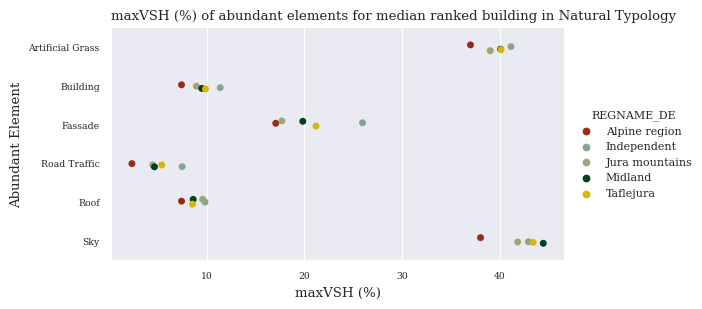

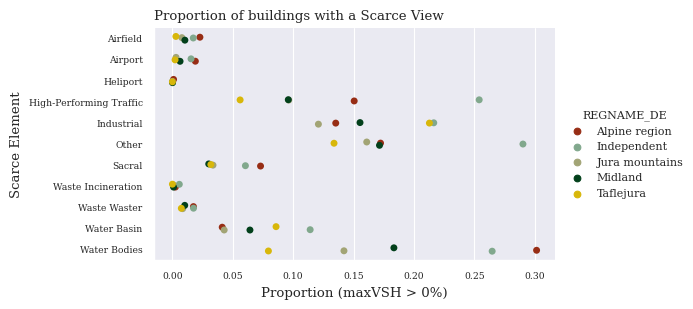

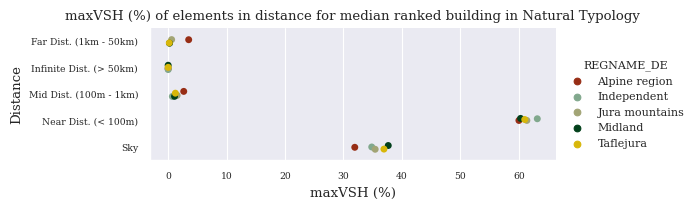

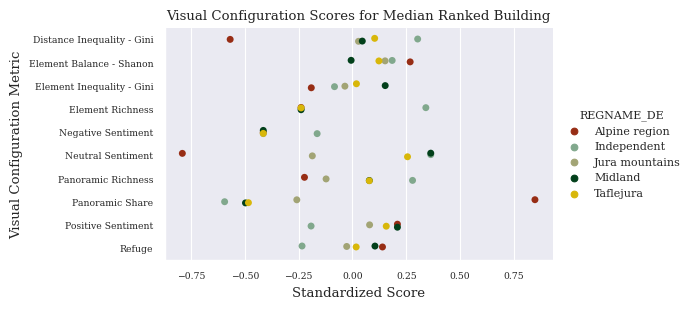

In [237]:
tgt = 'REGNAME_DE'
pal = ["#D8B70A", "#02401B", "#A2A475", "#81A88D", "#972D15"][::-1]


dat = dat_[[tgt] + abund_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('maxVSH (%)'),plt.ylabel('Abundant Element'), 

plt.title('maxVSH (%) of abundant elements for median ranked building in Natural Typology', x = 0, ha = 'left')

#_______________________________________________________________________________________________________________________


dat = dat_[[tgt] + scarce_maxvsh]
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).apply(lambda x: np.mean(x > 0)).reset_index()

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('Proportion (maxVSH > 0%)'),plt.ylabel('Scarce Element'), 

plt.title('Proportion of buildings with a Scarce View', x = 0, ha = 'left')


#_______________________________________________________________________________________________________________________

dat = dat_[[tgt] + dist_cols]
dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 2, aspect = 3, palette = pal)
plt.xlabel('maxVSH (%)'),plt.ylabel('Distance'), 

plt.title('maxVSH (%) of elements in distance for median ranked building in Natural Typology', ha = 'center')
# plt.xscale('log')

#_______________________________________________________________________________________________________________________


dat = dat_[[tgt] + vconfig_cols]

dat[vconfig_cols] = StandardScaler().fit_transform(dat[vconfig_cols])
# dat.columns = dat.columns.str.replace('sum_Sh', '')
dat = dat.rename(columns = rename_col)

grp = dat.melt(id_vars = tgt)
grp = grp.groupby([tgt,'variable']).median().reset_index()#.pivot(index = tgt, columns = 'variable', values = 'value')

sns.catplot(data = grp, y = 'variable', x = 'value', hue = tgt, kind = 'strip', height = 3, aspect = 2, palette = pal)
plt.xlabel('Standardized Score'),plt.ylabel('Visual Configuration Metric'), 

plt.title('Visual Configuration Scores for Median Ranked Building', ha = 'center')
# plt.xscale('log')
